<div style="text-align: center;">
  <img width="240" height="240" src="https://www.naterscreations.com/imputegap/logo_imputegab.png" />
</div>
<h1>ImputeGAP: Tutorial</h1>
<h6>Notebook 3: Benchmark</h6>





# 1.&nbsp;Installation


ImputeGAP is a comprehensive end-to-end imputation library that covers the whole imputation workflow, from data collection to explaining the results and their implications. It consists of two interconnected components: the imputation module and the advanced analysis module. These components can be used together through a standardized and configuration-based pipeline, or separately via independent instantiation. The documentation is available on: https://imputegap.readthedocs.io/.
This notebook showcases key steps of the imputation: imputation pipeline synthesis and advanced analysis. Before getting started, please make sure to install the library along with the required Jupyter dependencies:

In [ ]:
%pip install imputegap==1.1.1

In [ ]:
%pip install -U ipywidgets

In [ ]:
import pandas as pd
def imputegap_jupyter(matrix):
    df = pd.DataFrame(matrix).head(10).reset_index(drop=True)
    df.index += 1  # Start index at 1 instead of 0
    return df.style.format(precision=2)

# 6.&nbsp;Benchmarking Imputation Algorithms

ImputeGAP can serve as a common test-bed for comparing the effectiveness and efficiency of time series imputation algorithms. Users have full control over the benchmark by customizing various parameters, including the list of the algorithms to compare, the optimizer, the datasets to evaluate, the missingness patterns, the range of missing values, and the performance metrics.

## 6.2&nbsp;Benchmark with Default Parameters

The benchmarking module can be utilized as follows:

In [43]:
%matplotlib inline
from imputegap.recovery.benchmark import Benchmark

my_algorithms = ["MeanImpute", "CDRec"]

my_opt = ["default_params"]

my_datasets = ["eeg-alcohol"]

my_patterns = ["mcar"]

range = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8]

my_metrics = ["RMSE", "MAE", "MI", "CORRELATION", "RUNTIME", "RUNTIME_LOG"]

# launch the evaluation
bench = Benchmark()
bench.eval(algorithms=my_algorithms, datasets=my_datasets, patterns=my_patterns, x_axis=range, metrics=my_metrics, optimizers=my_opt)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/eeg-alcohol.txt

MeanImpute is tested with mcar, started at 2025-08-04 00:09:00.
done!


CDRec is tested with mcar, started at 2025-08-04 00:09:04.
done!



> logs: benchmark - Execution Time: 29.0577 seconds


eegalcohol: {mcar, RMSE, default_params}

 Rate         CDRec             MeanImpute     

 0.05      0.4216413296        1.1073947986    
  0.1      0.3642898723        0.8569349077    
  0.2      0.4039540686        0.9924113085    
  0.4      0.4379822995        1.0058063455    
  0.6      0.4574192824        0.9891809506    
  0.8      0.4782377774        0.9927953863    



eegalcohol: {mcar, RUNTIME[ms], default_params}

 Rate         CDRec             MeanImpute     

 0.05    1379.3787956238      13.4942531586    
  0.1    1406.3441753387       1.0000000000    
  0.2    1789.2258167267       1.0000000000    
  0.4    2283.4713459015       1.0000000000    
  0.6 

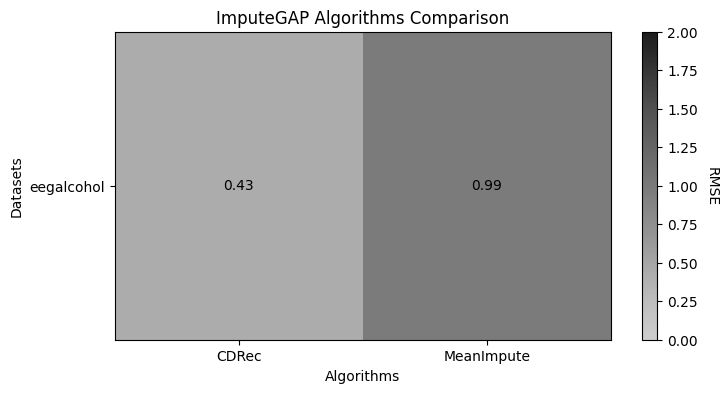

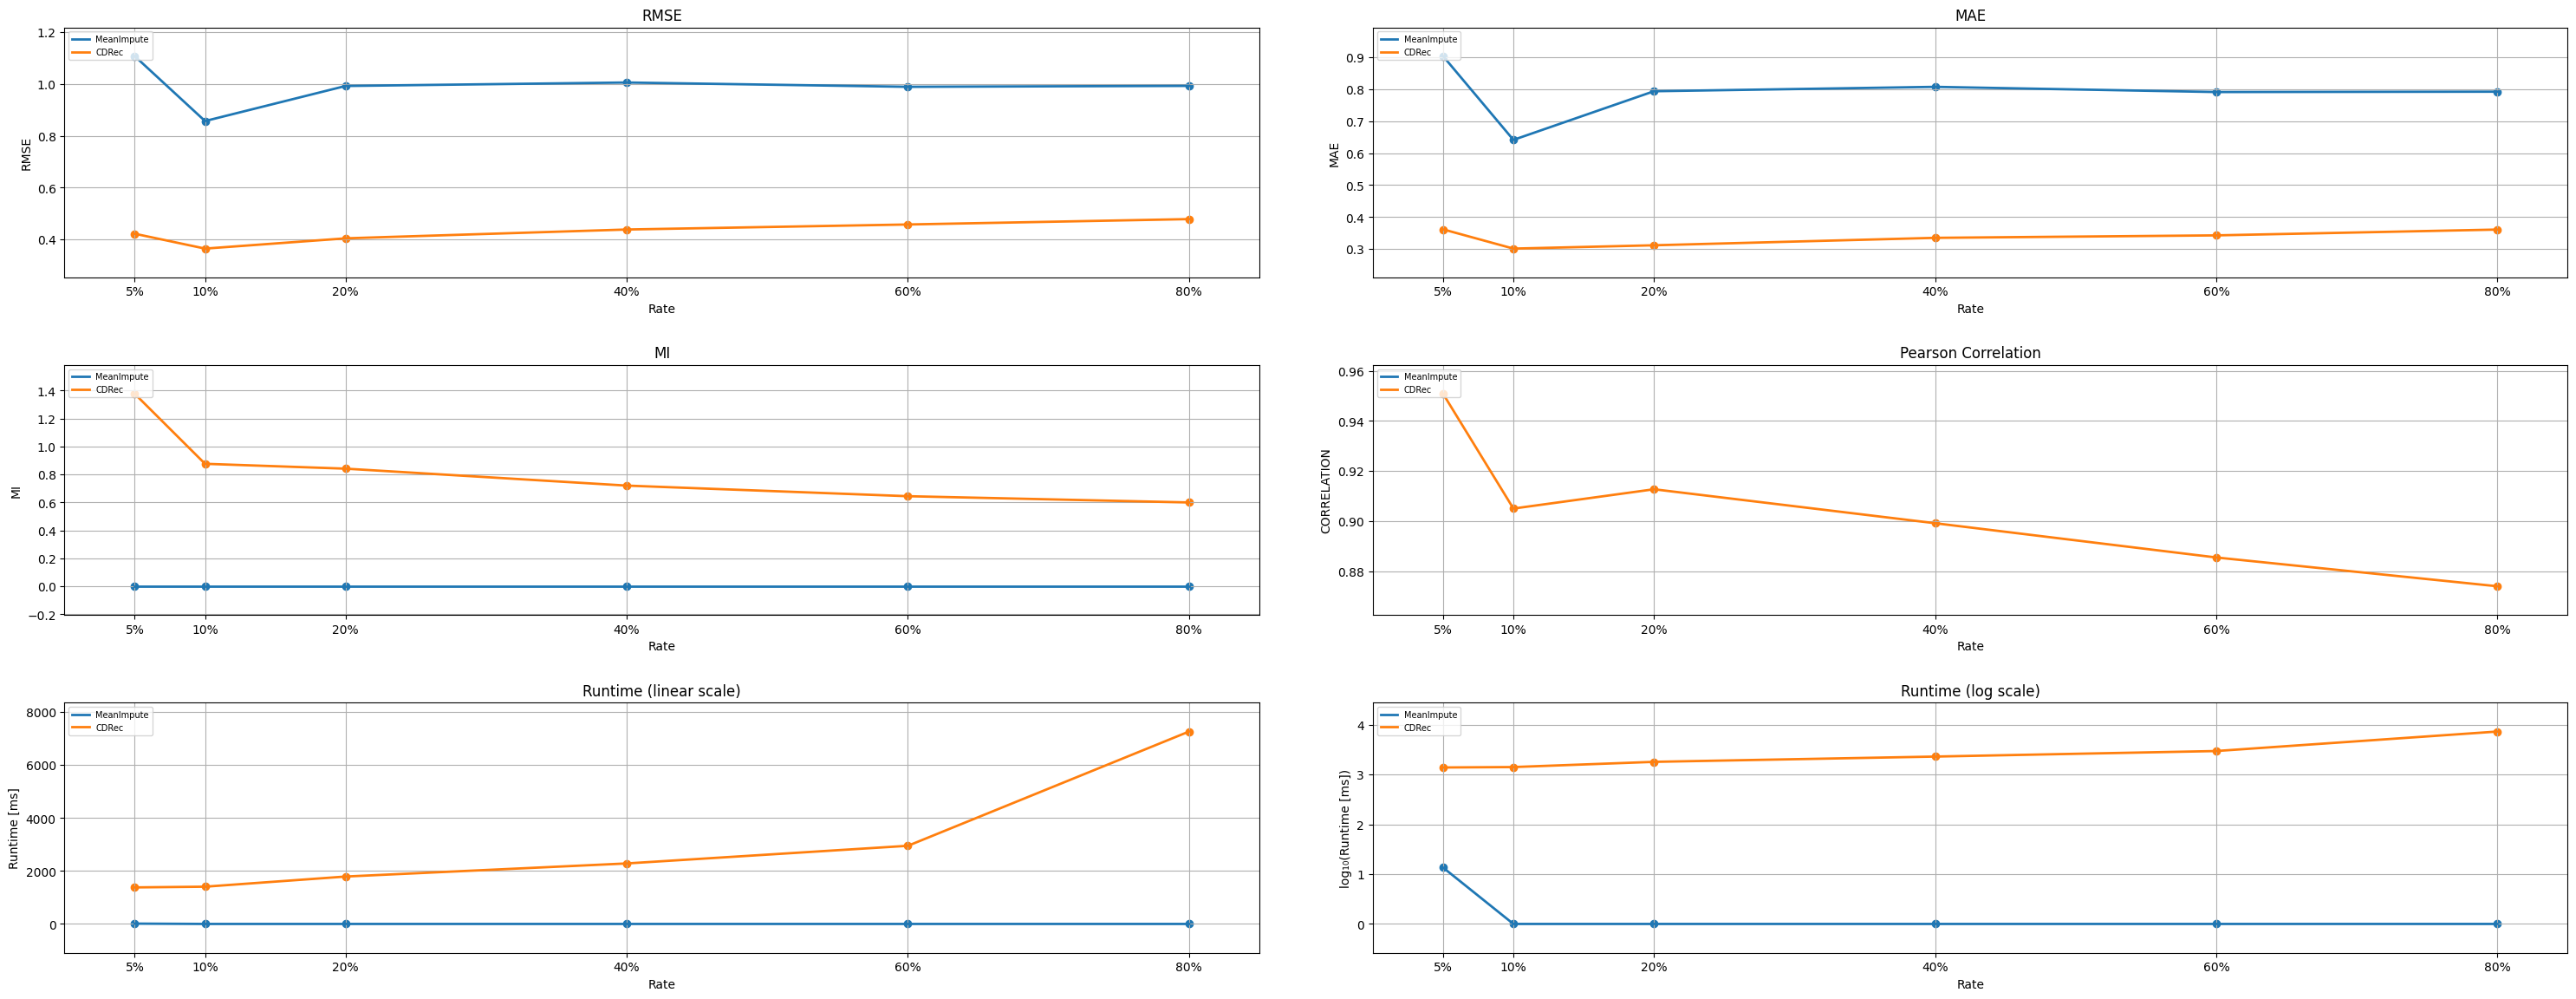

In [44]:
%matplotlib inline
bench.plots.show()

More recent techniques such as LLMs, can be added to the benchmark. To do so, we will compare the performance of GPT4TS and CDREC, with default parameters, on the chlorine dataset contaminated with the aligned pattern.

In [14]:
%matplotlib inline
from imputegap.recovery.benchmark import Benchmark

my_algorithms = ["GPT4TS", "CDRec"]

my_opt = ["default_params"]

my_datasets = ["chlorine"]

my_patterns = ["mcar"]

range = [0.1, 0.2]

my_metrics = ["*"]

# launch the evaluation
bench = Benchmark()
bench.eval(algorithms=my_algorithms, datasets=my_datasets, patterns=my_patterns, x_axis=range, metrics=my_metrics, optimizers=my_opt)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/chlorine.txt

GPT4TS is tested with mcar, started at 2025-08-04 18:14:46.
done!


CDRec is tested with mcar, started at 2025-08-04 18:15:28.
done!



> logs: benchmark - Execution Time: 47.5105 seconds


chlorine: {mcar, RMSE, default_params}

 Rate         CDRec               GPT4TS       

  0.1      0.3593872719        0.7923586116    
  0.2      0.4329813562        0.8909317637    



chlorine: {mcar, RUNTIME[ms], default_params}

 Rate         CDRec               GPT4TS       

  0.1     905.3297042847     22986.7808818817  
  0.2     584.3136310577     18167.7889823914  



The plots have been generated...


The results are saved in :  ./imputegap_assets/benchmark/bench_25_08_04_18_14_46 



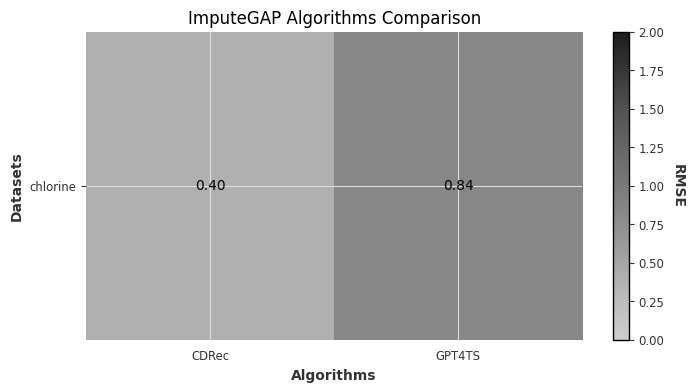

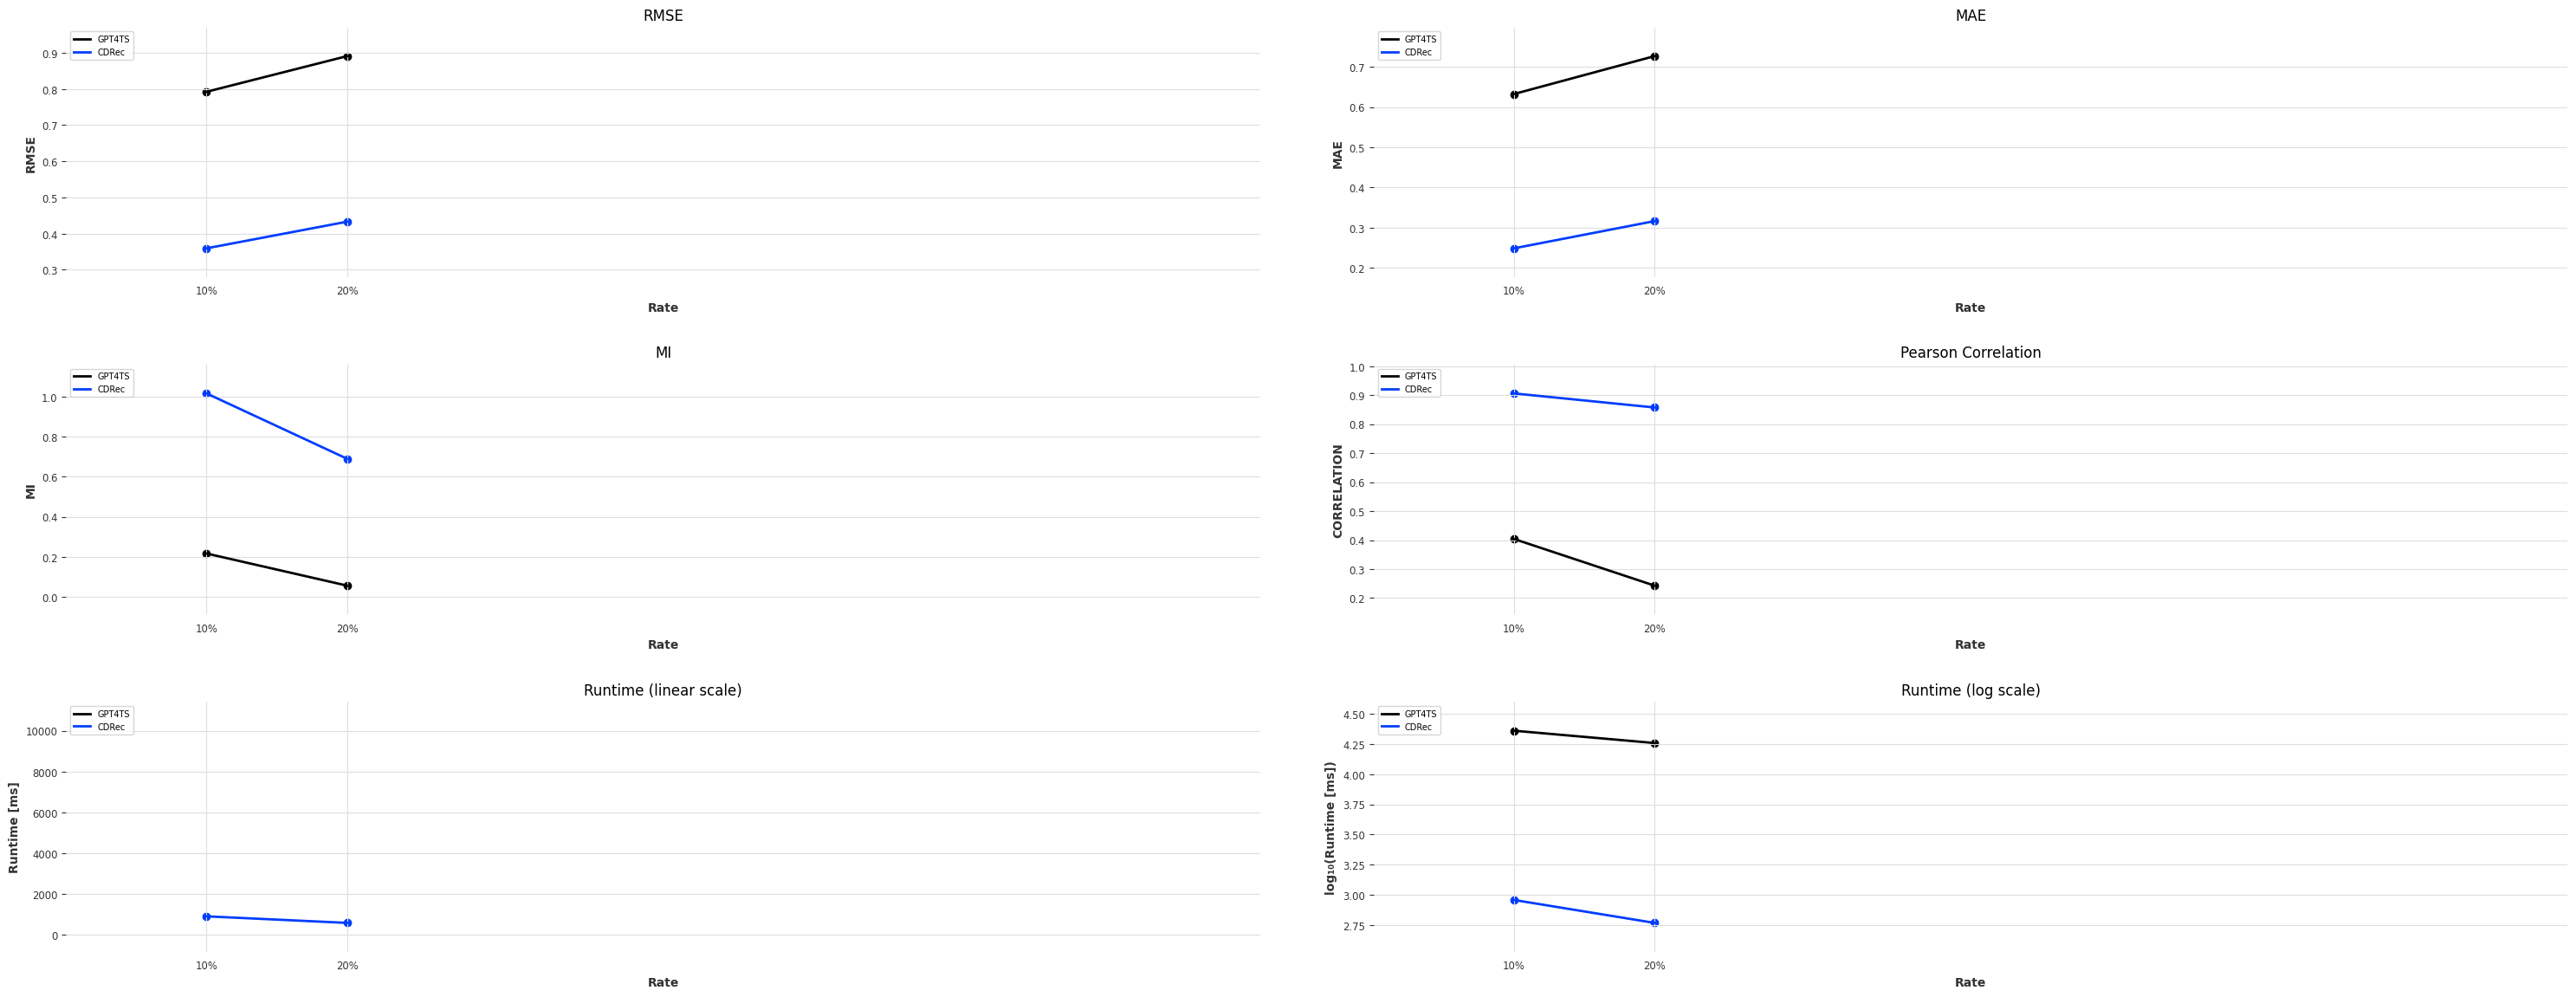

In [15]:
%matplotlib inline
bench.plots.show()

## 6.2&nbsp;Benchmark with Optimization

In this use-case, we will compare two algorithms MeanImpute and CDRec using  Ray Tune optimizer to find the optimal parameter values.

In [ ]:
%matplotlib inline
from imputegap.recovery.benchmark import Benchmark

my_algorithms = ["MeanImpute", "CDRec"]

my_opt = [{"optimizer": "ray_tune"}]

my_datasets = ["eeg-alcohol"]

my_patterns = ["mcar"]

range = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8]

my_metrics = ["*"]

# launch the evaluation
bench = Benchmark()
bench.eval(algorithms=my_algorithms, datasets=my_datasets, patterns=my_patterns, x_axis=range, metrics=my_metrics, optimizers=my_opt)

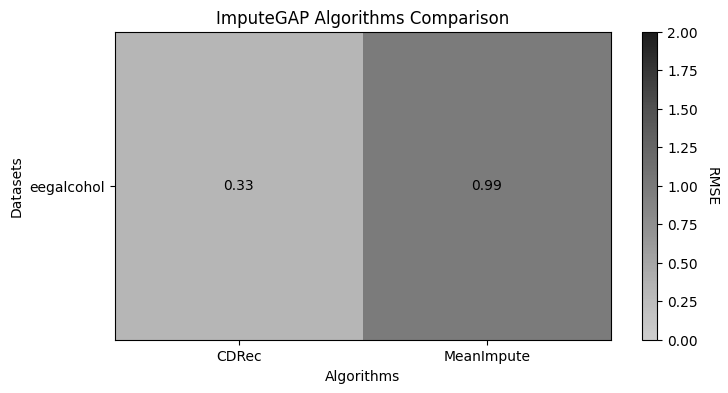

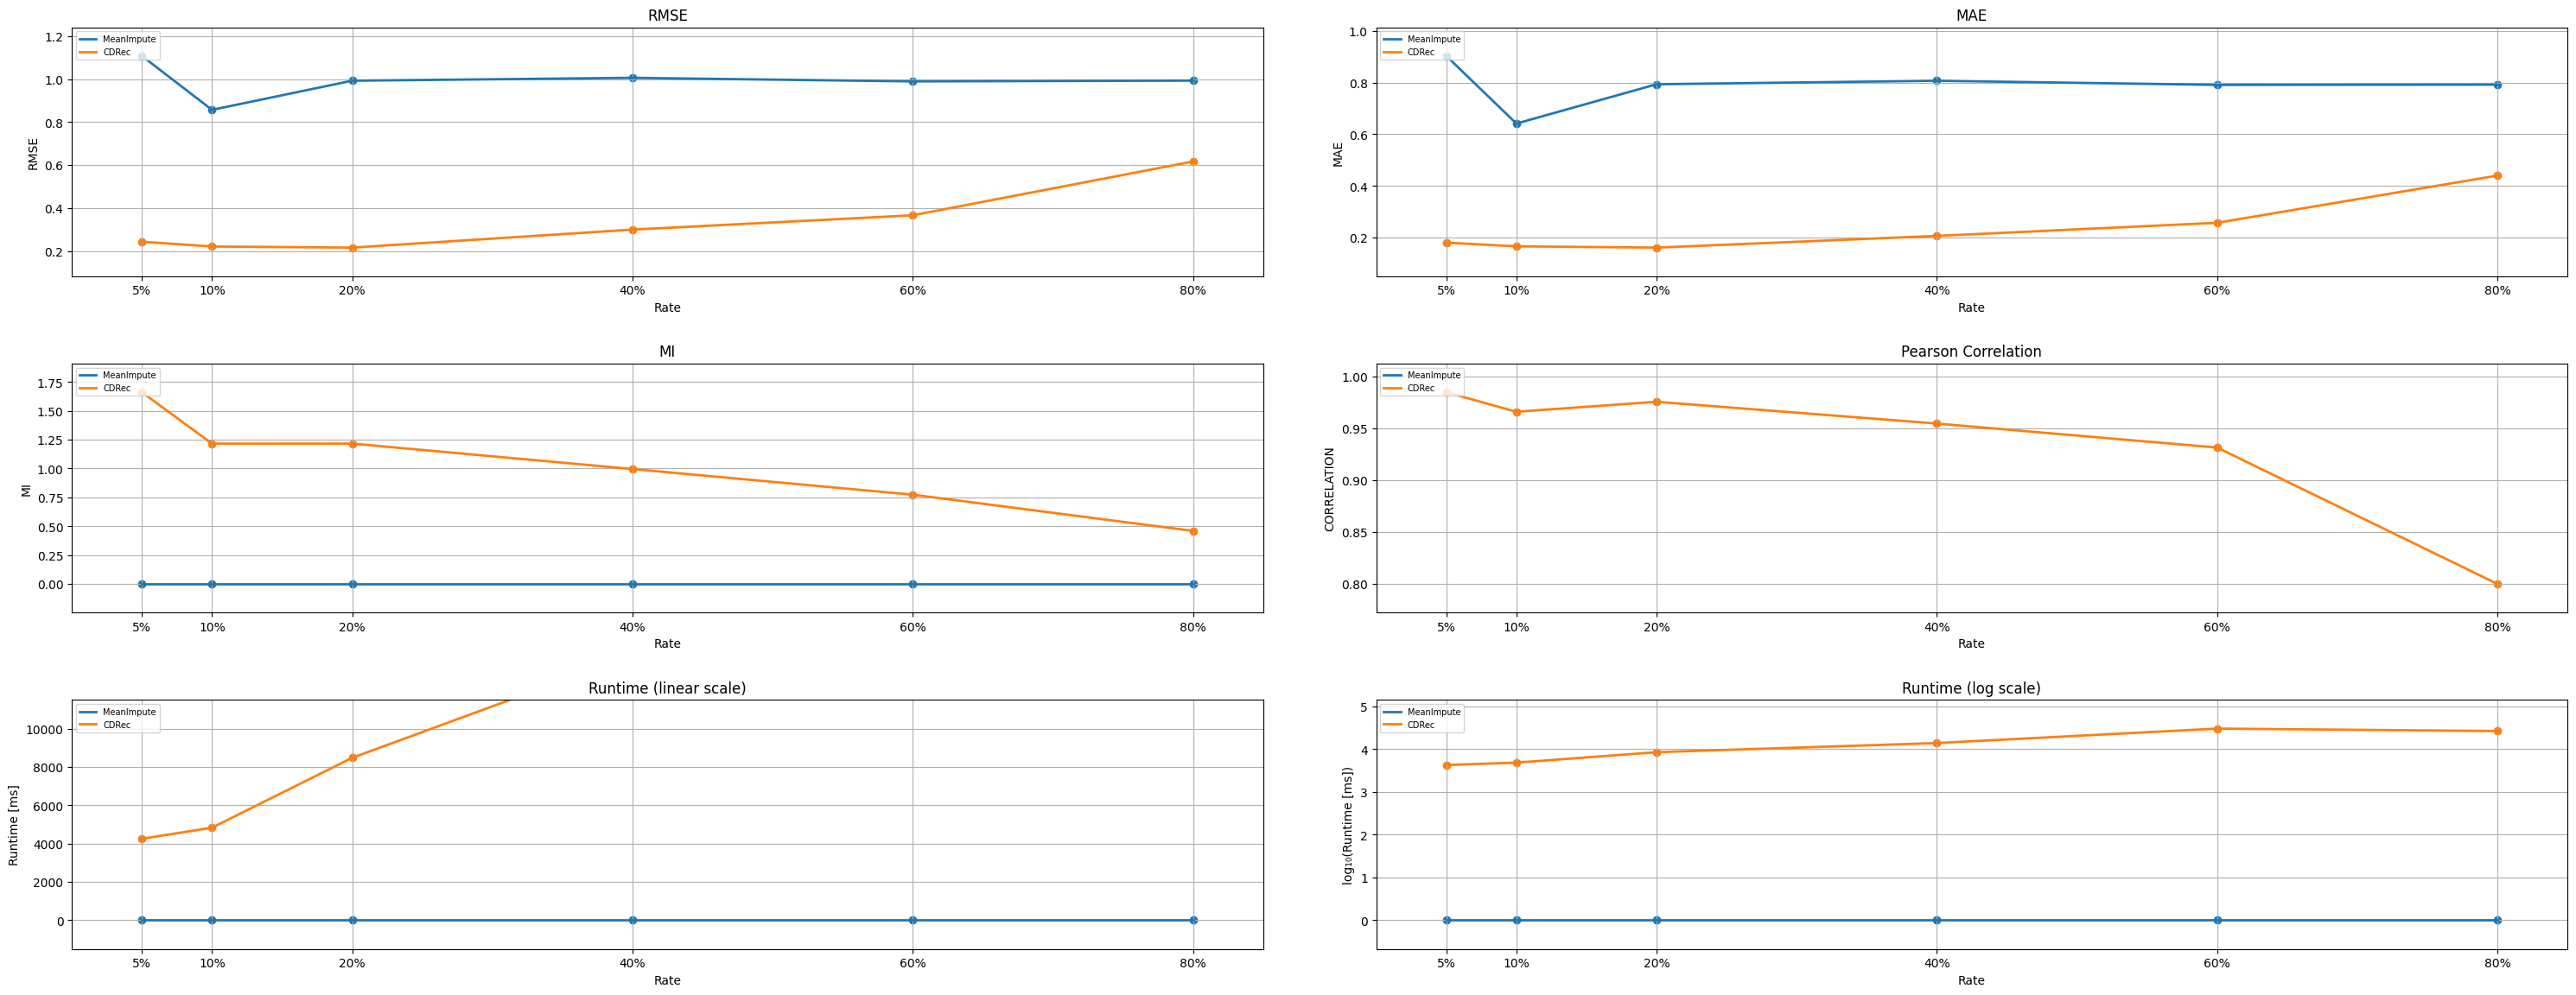

In [48]:
%matplotlib inline
bench.plots.show()

<br>

More KDD tutorials: https://imputegap-tutorials.github.io/KDD-2025/html/slides_codes.html

<br>
